In [1]:
import sys
import os
import random
import h5py
from collections import Counter
from progressbar import *
import re
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

# Add the path to the parent directory to augment search for module
par_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))

if par_dir not in sys.path:
    sys.path.append(par_dir)

from utils.plot_utils import *  
    
%load_ext autoreload

In [2]:
mpmt_positions = np.load("/data/WatChMaL/data/IWCD_mPMT_image_positions.npz")['mpmt_image_positions']
pmt_array_coordinates = np.load("/fast_scratch/WatChMaL/data/mPMT_full_geo.npz")['position']

fd = open('/fast_scratch/WatChMaL/data/IWCDmPMT_4pi_full_tank_pointnet.h5', 'rb')
f = h5py.File(fd, "r")

hdf5_labels = f["labels"]
hdf5_energies = f["energies"]
hdf5_positions = f["positions"]
hdf5_angles = f["angles"]
hdf5_hit_pmt = f["hit_pmt"]
hdf5_hit_charge = f["hit_charge"]
hdf5_hit_time = f["hit_time"]
hdf5_event_hits_index = f["event_hits_index"]

In [3]:
mpmt_positions = np.load("/data/WatChMaL/data/IWCD_mPMT_image_positions.npz")['mpmt_image_positions']
pmt_array_coordinates = np.load("/fast_scratch/WatChMaL/data/mPMT_full_geo.npz")['position']
hit_pmts = np.arange(pmt_array_coordinates.shape[0])
hit_mpmts = hit_pmts // 19
hit_pmt_in_modules = hit_pmts % 19
hit_rows = mpmt_positions[hit_mpmts, 0]
hit_cols = mpmt_positions[hit_mpmts, 1]
image_pmt_coordinates = np.empty((19,40,40,3))
image_pmt_coordinates[:] = np.nan
image_pmt_coordinates[hit_pmt_in_modules,hit_rows,hit_cols,:] = pmt_array_coordinates

## Z coordinates - plot an array in the barrel

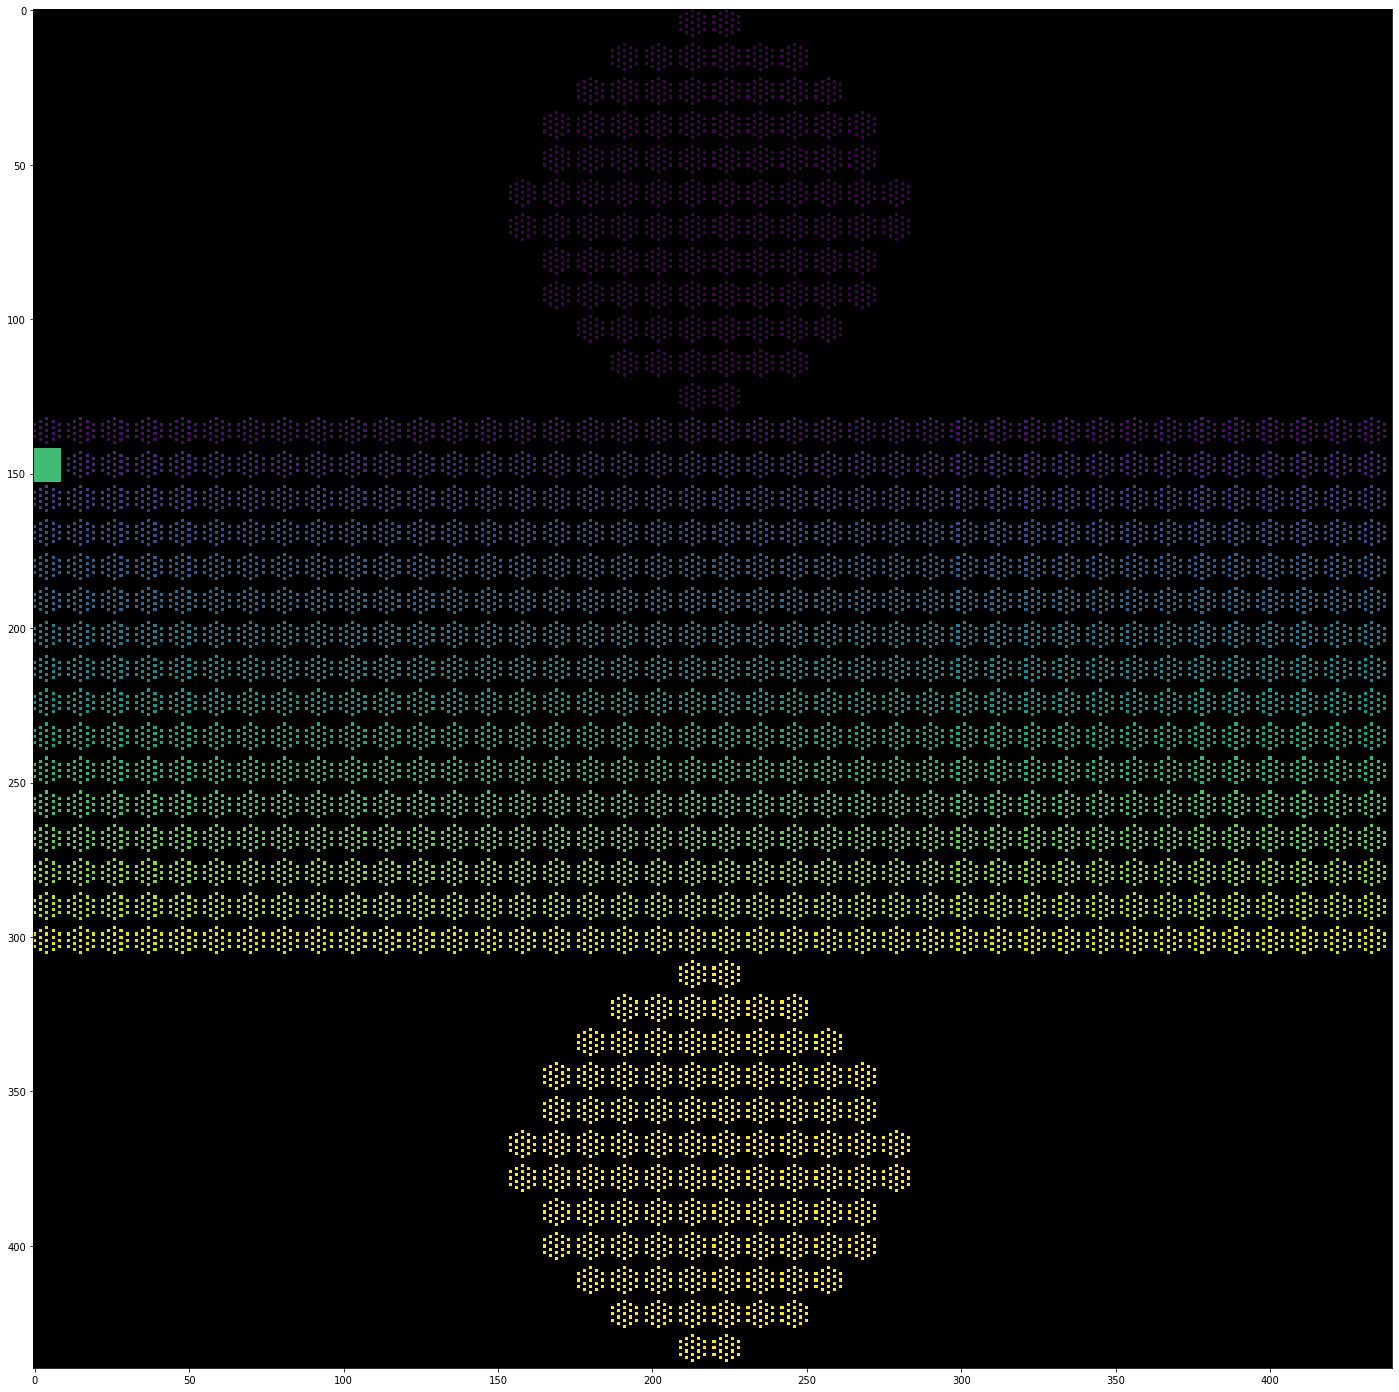

In [4]:
fig, ax = plt.subplots(1,1,figsize=(25,25),facecolor='w')
cmap = plt.cm.viridis
cmap.set_bad(color='black')
a=get_plot_array(np.moveaxis(image_pmt_coordinates[:,:,:,1],0,2))
# a = image_pmt_coordinates[1,:,:,2]
a[142:153,0:9]=200
ax.imshow(a,
           origin="upper",
           cmap=cmap
           )
plt.show()

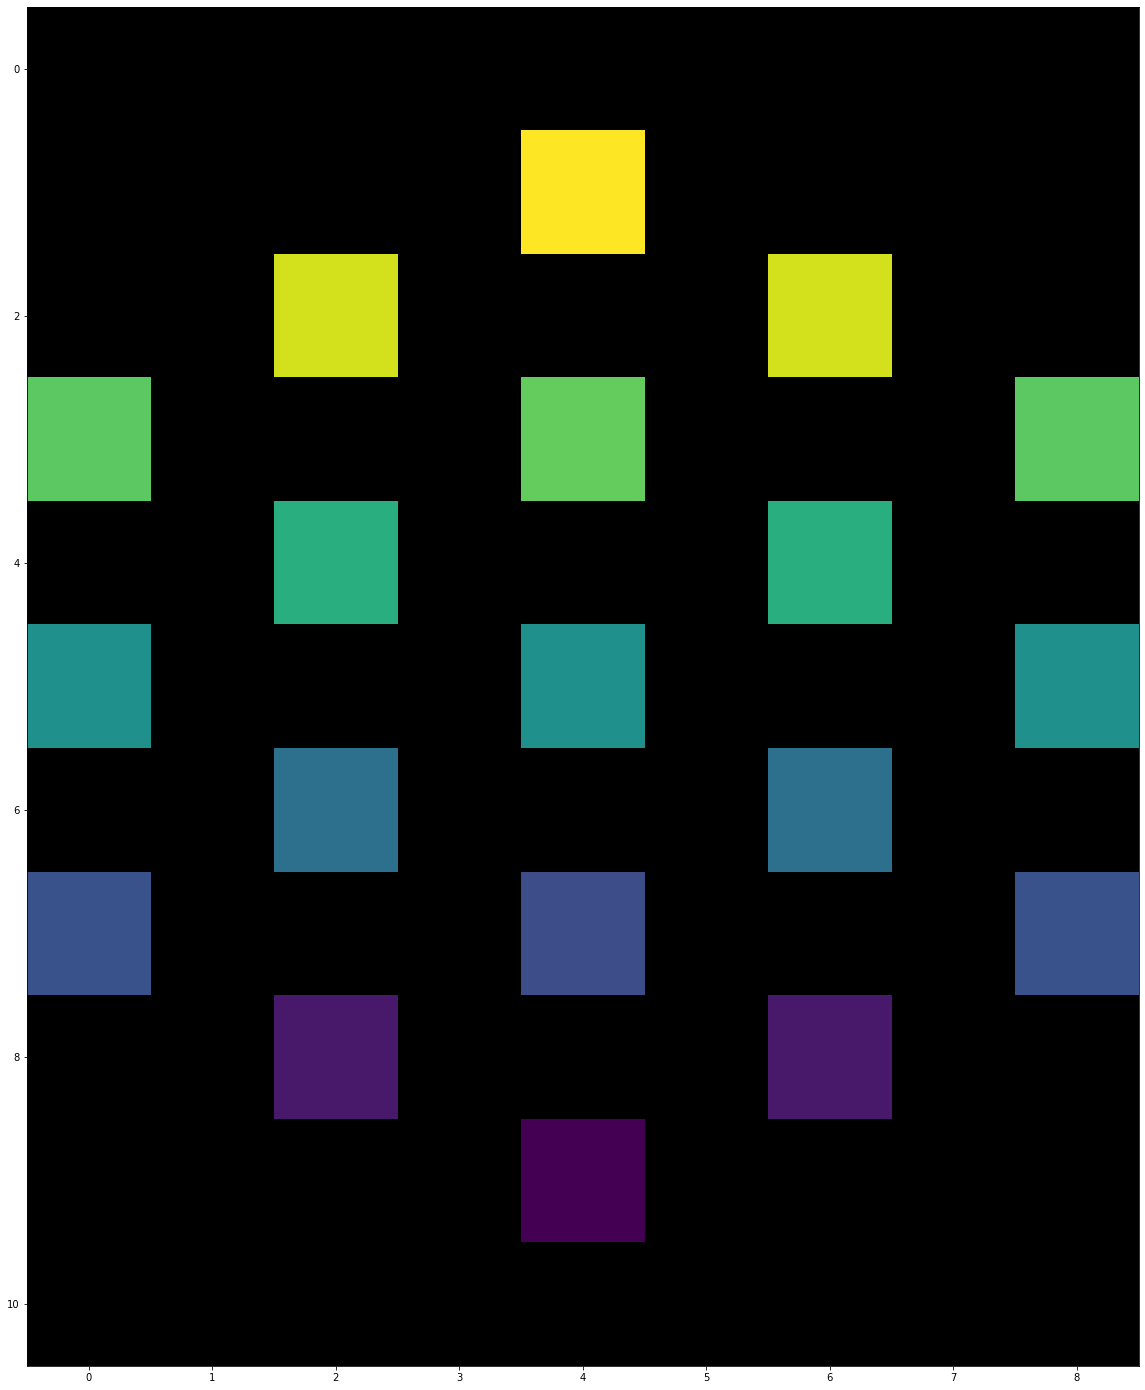

In [5]:
fig, ax = plt.subplots(1,1,figsize=(25,25),facecolor='w')
cmap = plt.cm.viridis
cmap.set_bad(color='black')
a=get_plot_array(np.moveaxis(image_pmt_coordinates[:,:,:,1],0,2))
# a = image_pmt_coordinates[1,:,:,2]
ax.imshow(a[142:153,0:9],
           origin="upper",
           cmap=cmap
           )
plt.show()

## X Co-ordinate

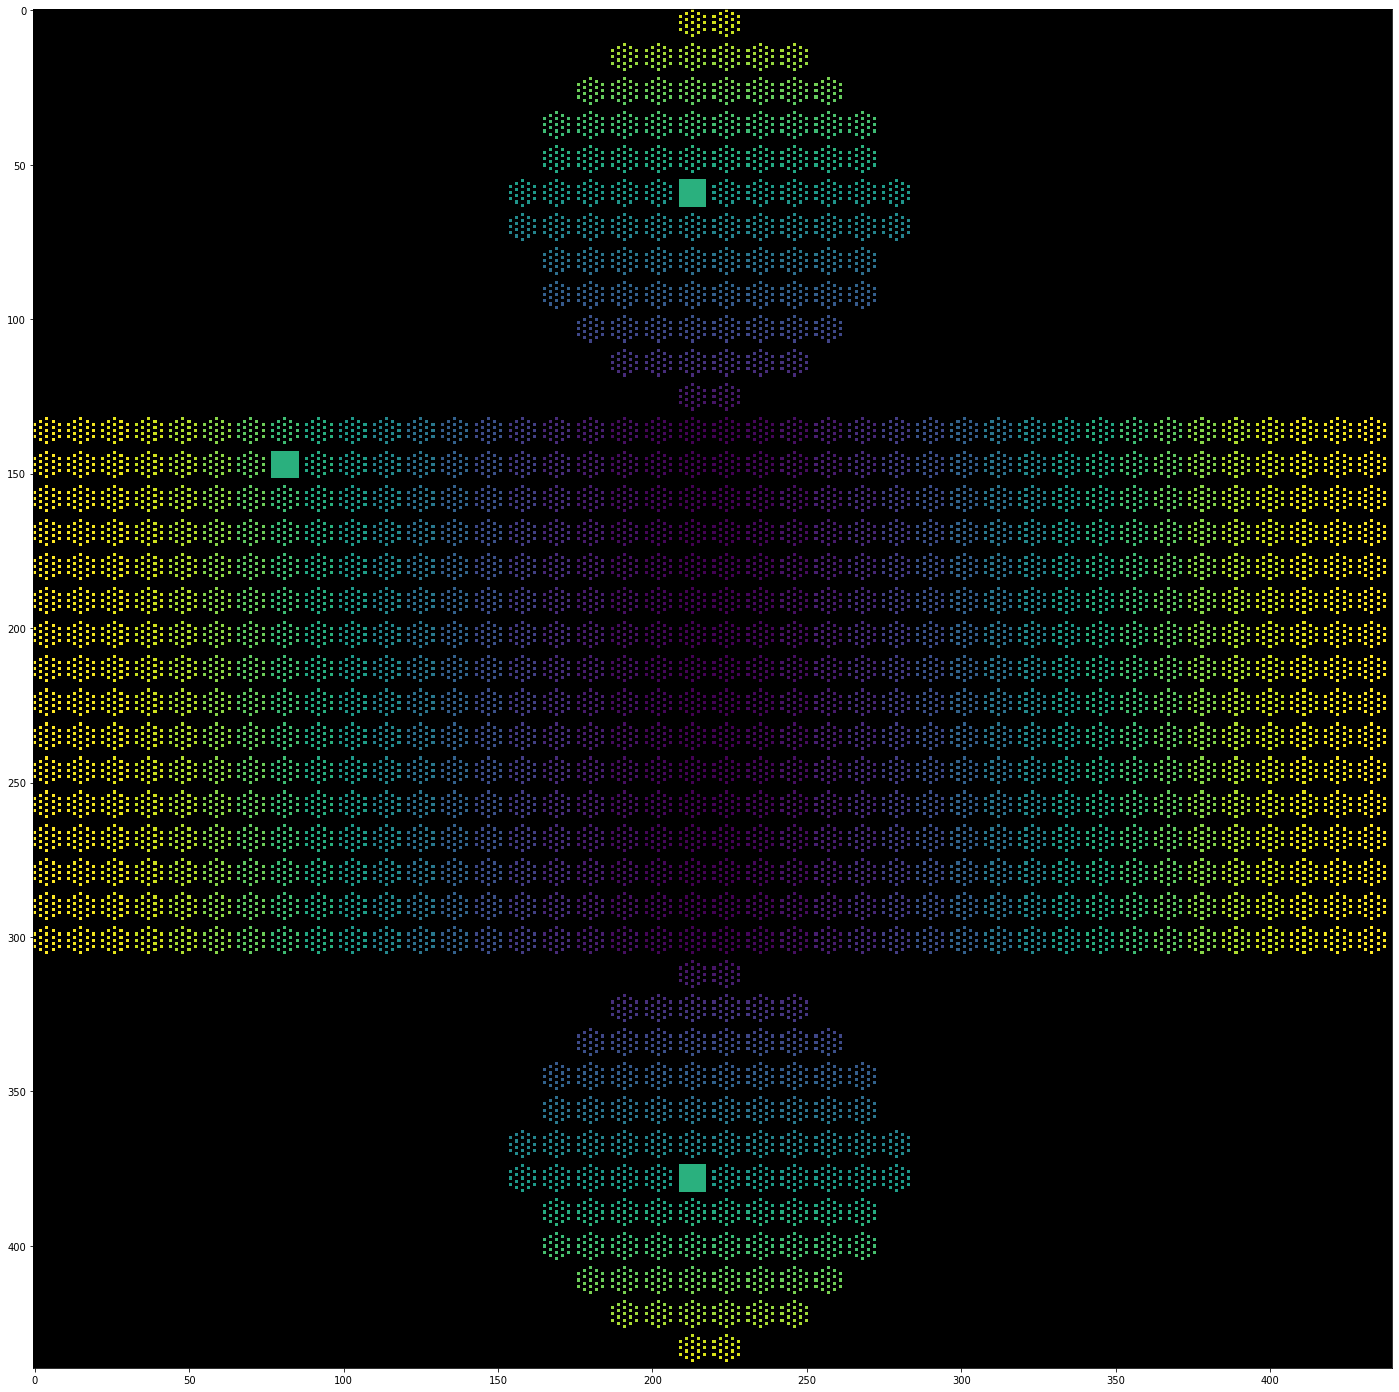

In [6]:
fig, ax = plt.subplots(1,1,figsize=(25,25),facecolor='w')
cmap = plt.cm.viridis
cmap.set_bad(color='black')
a=get_plot_array(np.moveaxis(image_pmt_coordinates[:,:,:,0],0,2))
# a = image_pmt_coordinates[1,:,:,2]
a[55:64, 209:218] = 100
a[143:152,77:86] = 100
a[374:383,209:218] = 100
ax.imshow(a,
           origin="upper",
           cmap=cmap,
         )
plt.show()

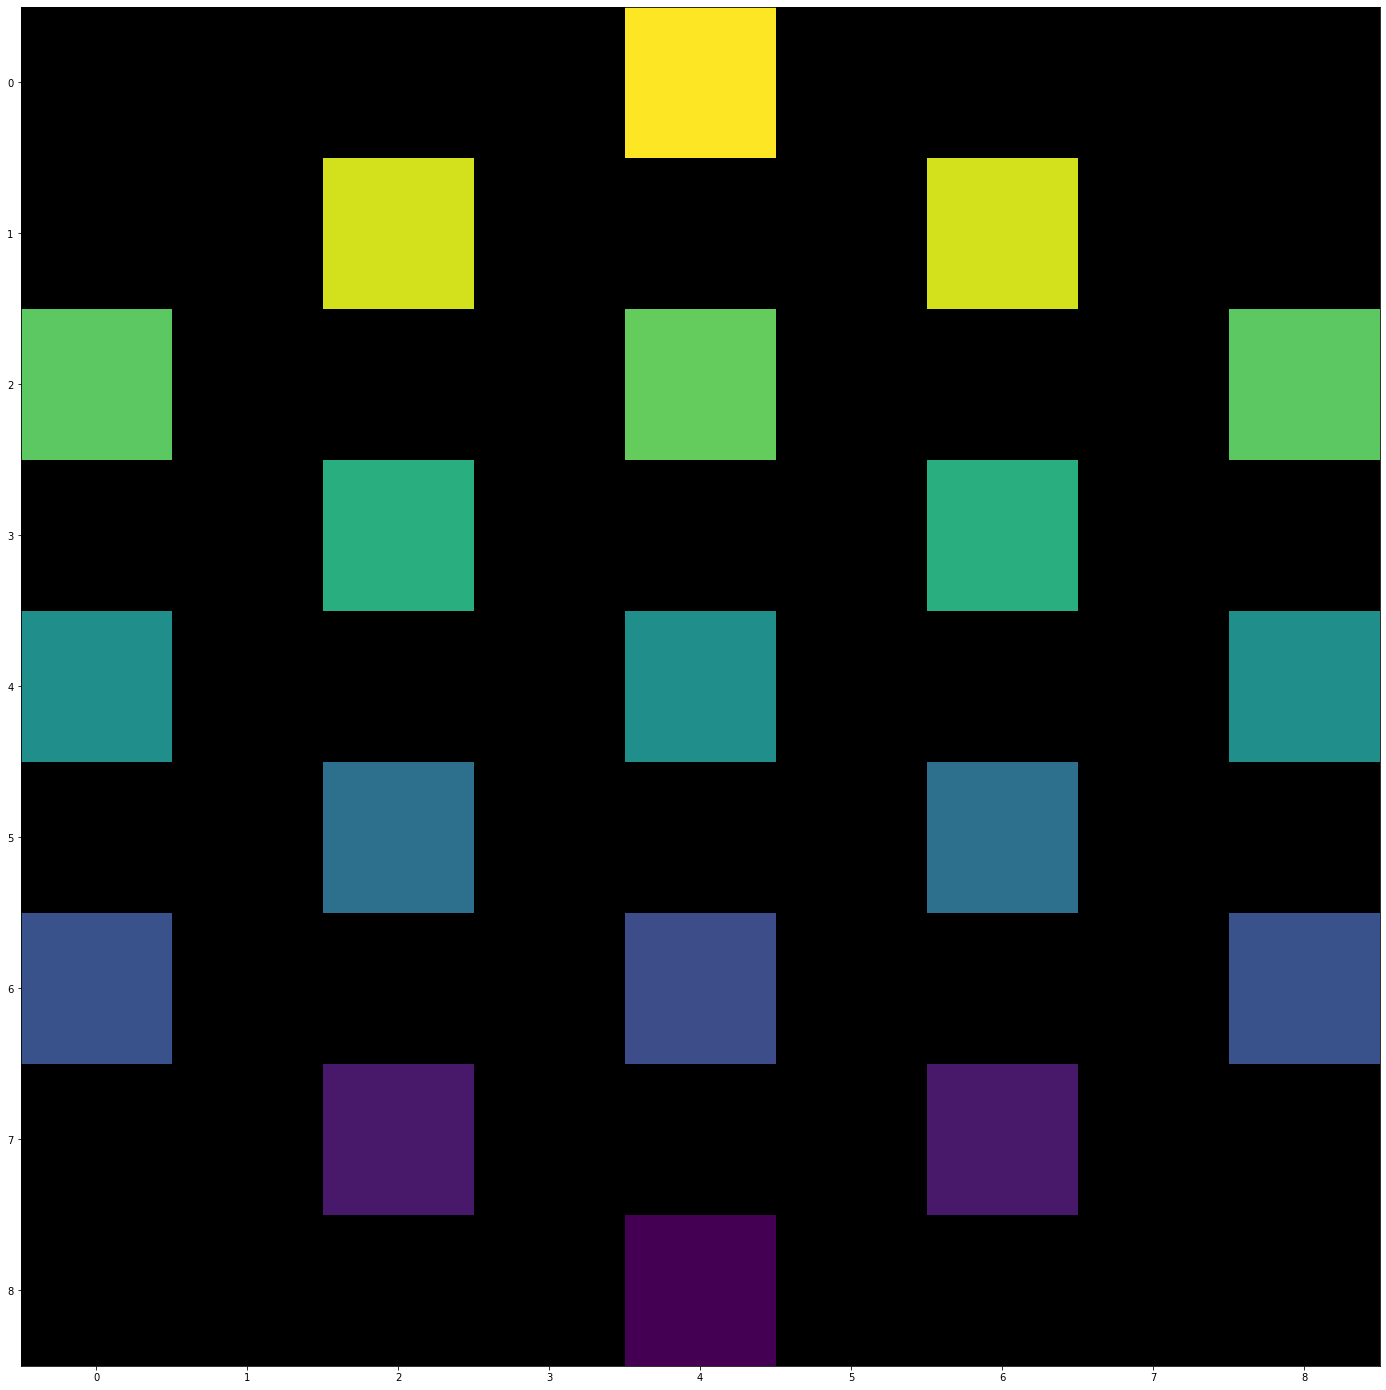

In [7]:
fig, ax = plt.subplots(1,1,figsize=(25,25),facecolor='w')
cmap = plt.cm.viridis
cmap.set_bad(color='black')
a=get_plot_array(np.moveaxis(image_pmt_coordinates[:,:,:,0],0,2))
# a = image_pmt_coordinates[1,:,:,2]
ax.imshow(a[55:64, 209:218],
           origin="upper",
           cmap=cmap,
         )
plt.show()

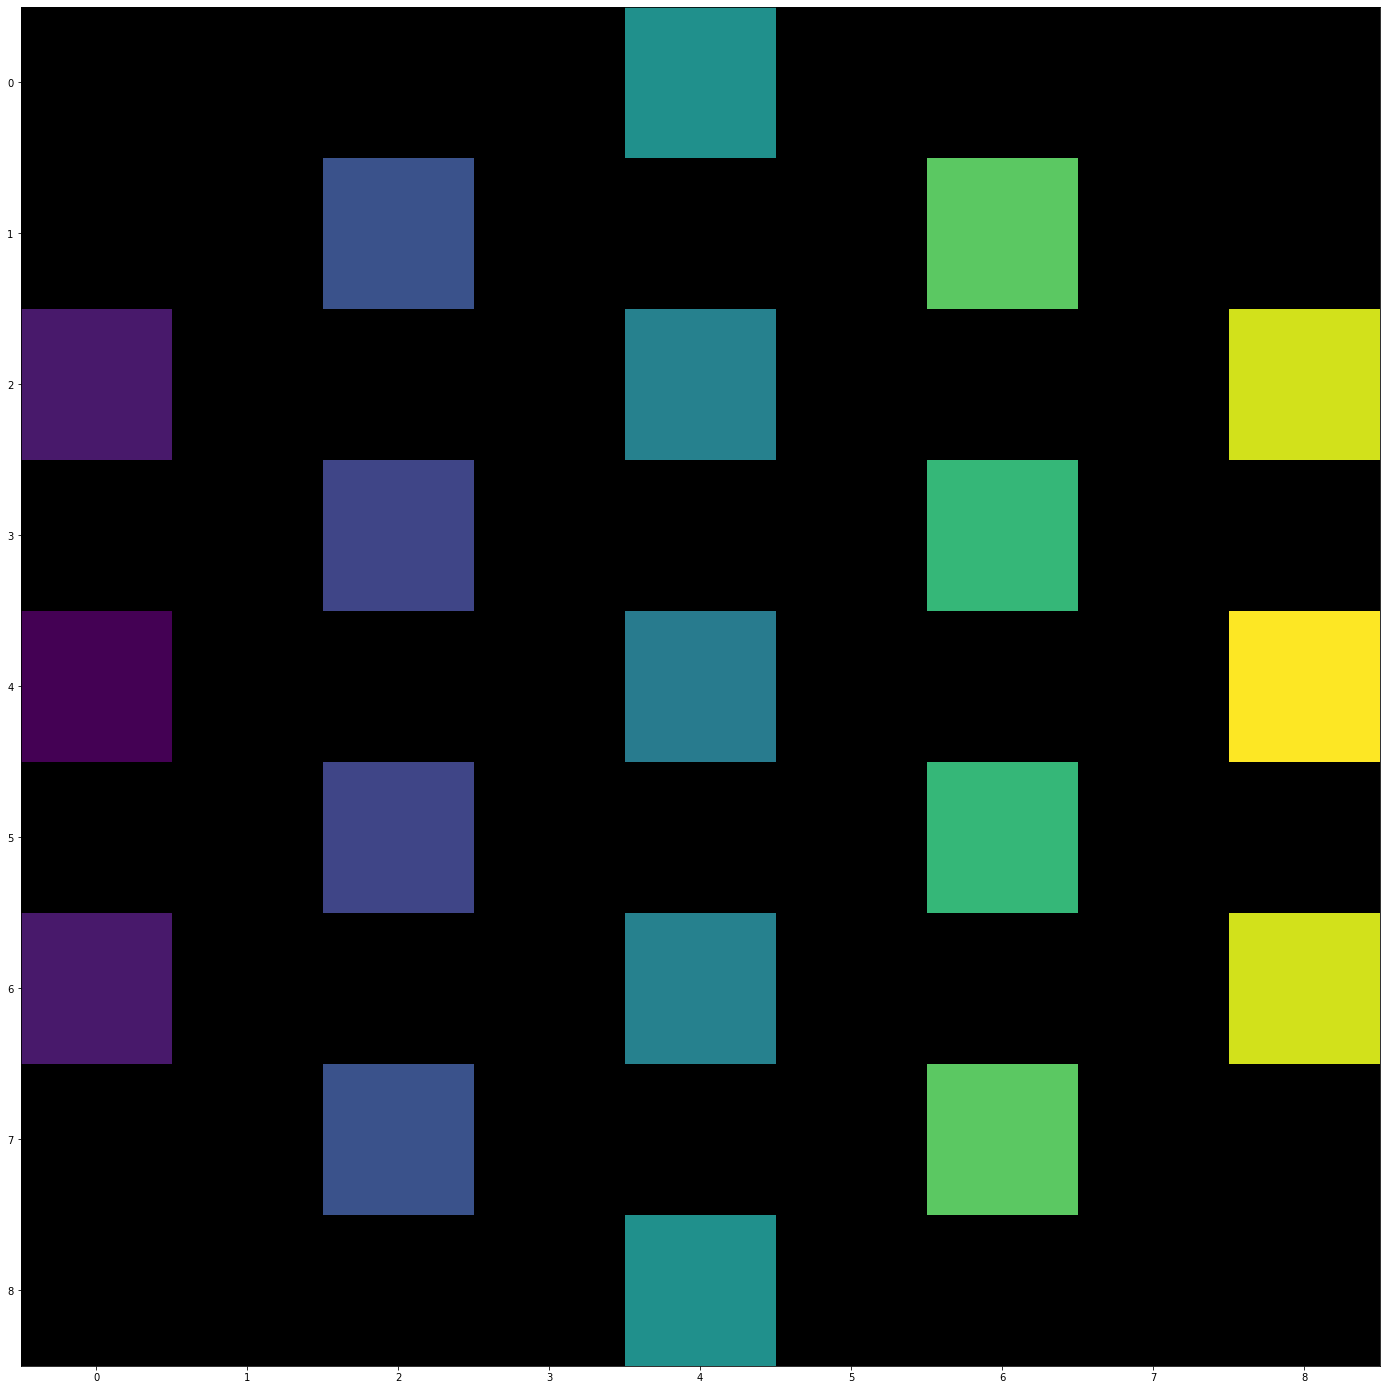

In [8]:
fig, ax = plt.subplots(1,1,figsize=(25,25),facecolor='w')
cmap = plt.cm.viridis
cmap.set_bad(color='black')
a=get_plot_array(np.moveaxis(image_pmt_coordinates[:,:,:,0],0,2))
ax.imshow(a[143:152,77:86],
           origin="upper",
           cmap=cmap,
         )
plt.show()

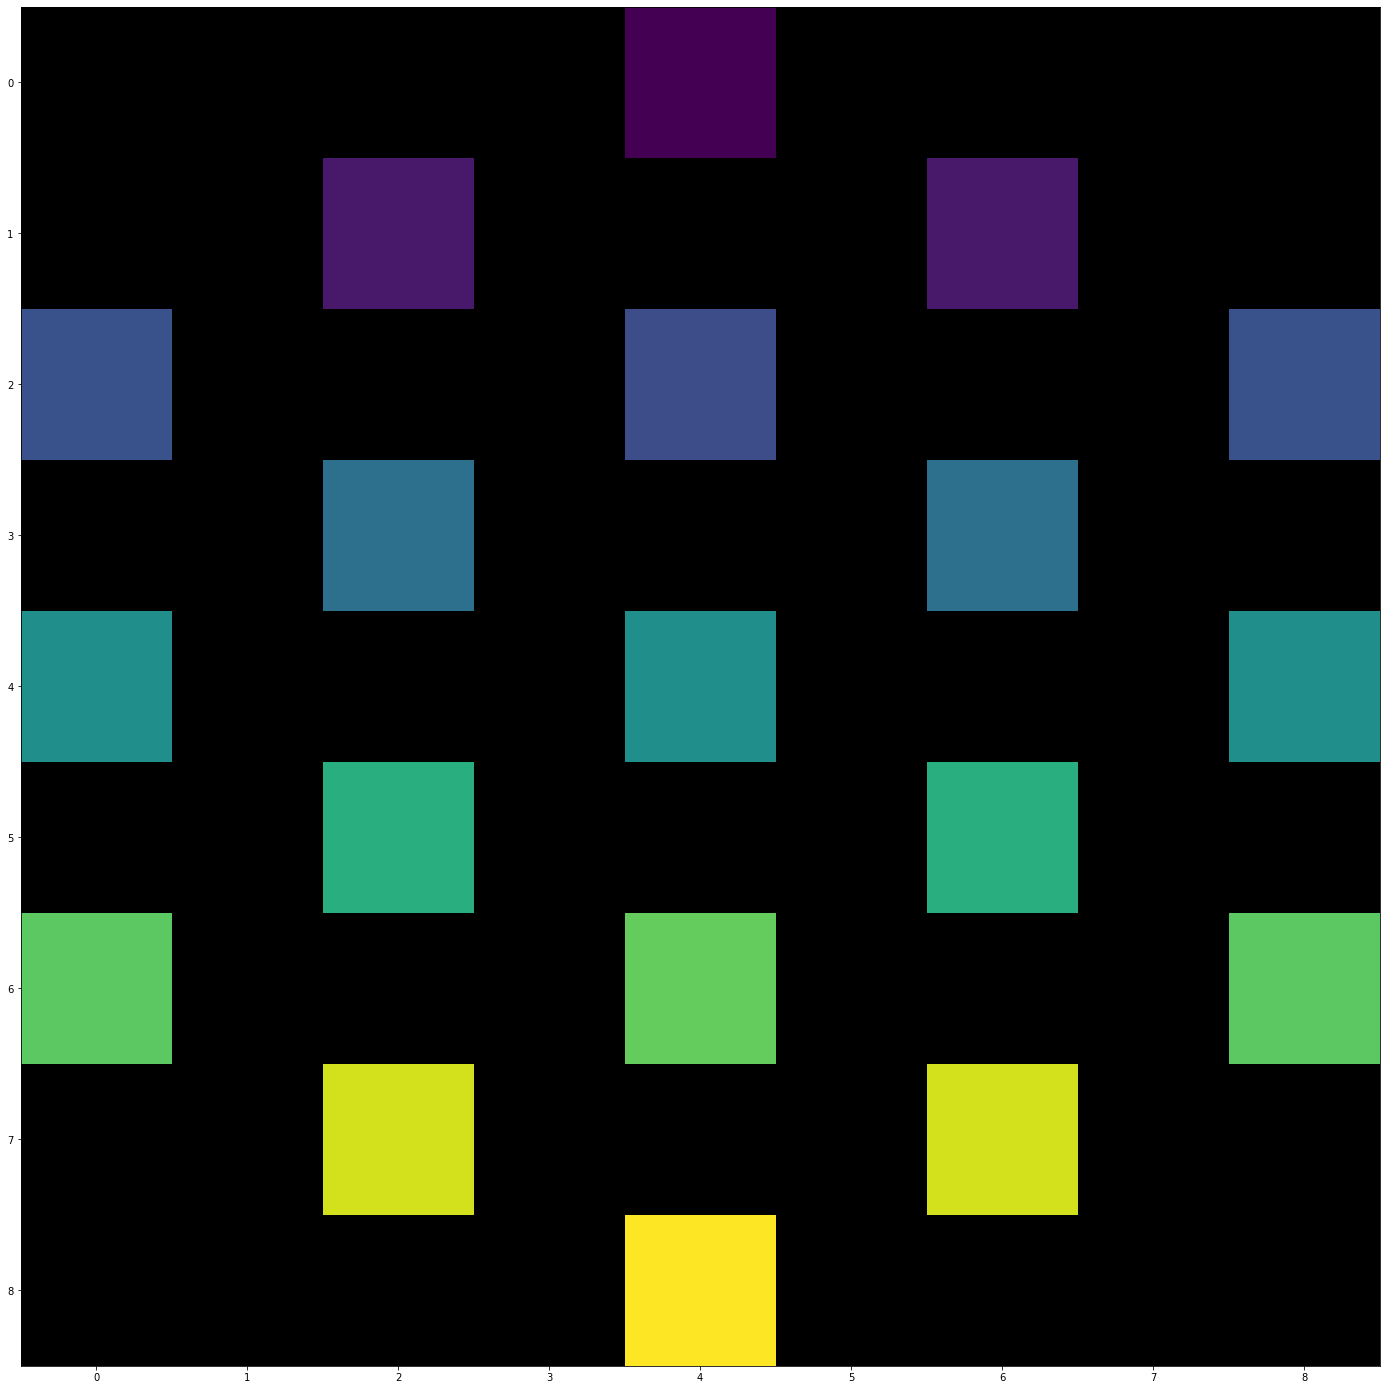

In [9]:
fig, ax = plt.subplots(1,1,figsize=(25,25),facecolor='w')
cmap = plt.cm.viridis
cmap.set_bad(color='black')
a=get_plot_array(np.moveaxis(image_pmt_coordinates[:,:,:,0],0,2))
ax.imshow(a[374:383,209:218],
           origin="upper",
           cmap=cmap,
         )
plt.show()

## Y Co-ordinate

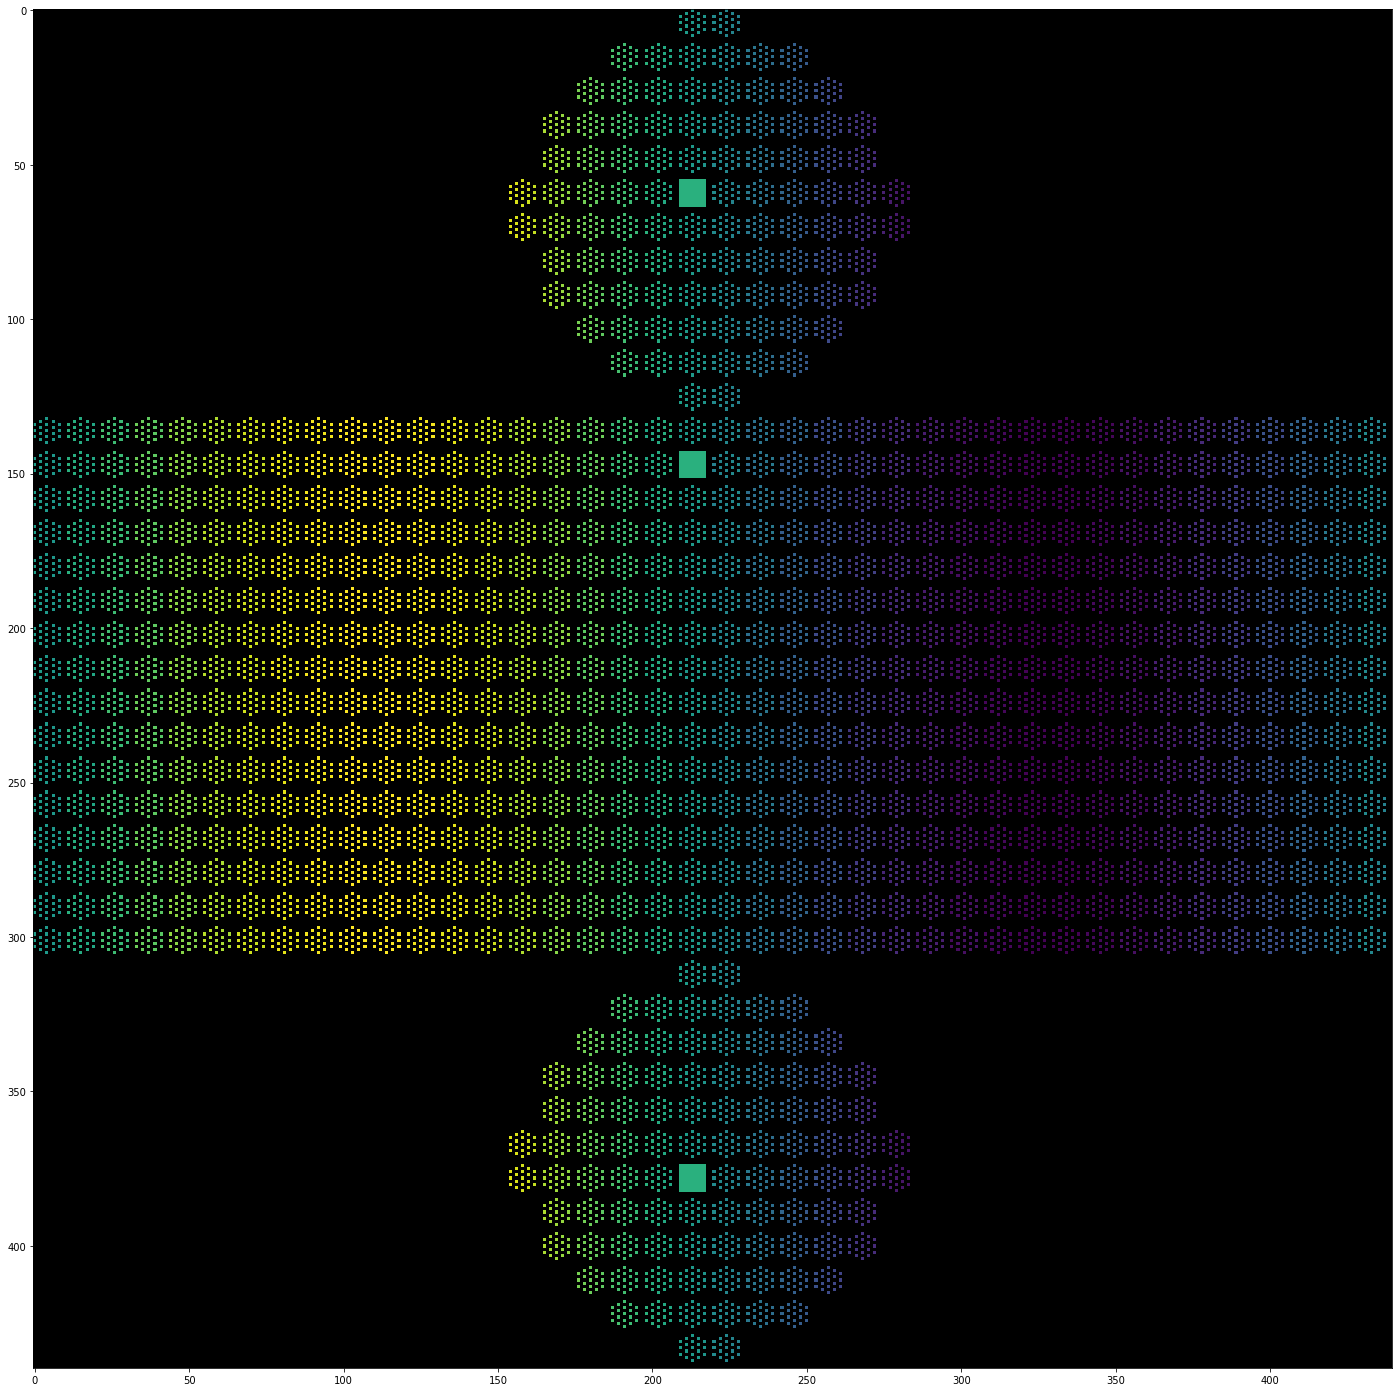

In [10]:
fig, ax = plt.subplots(1,1,figsize=(25,25),facecolor='w')
cmap = plt.cm.viridis
cmap.set_bad(color='black')
a=get_plot_array(np.moveaxis(image_pmt_coordinates[:,:,:,2],0,2))
# a = image_pmt_coordinates[1,:,:,2]
a[55:64, 209:218] = 100
a[143:152,209:218] = 100
a[374:383,209:218] = 100
ax.imshow(a,
           origin="upper",
           cmap=cmap,
         )
plt.show()

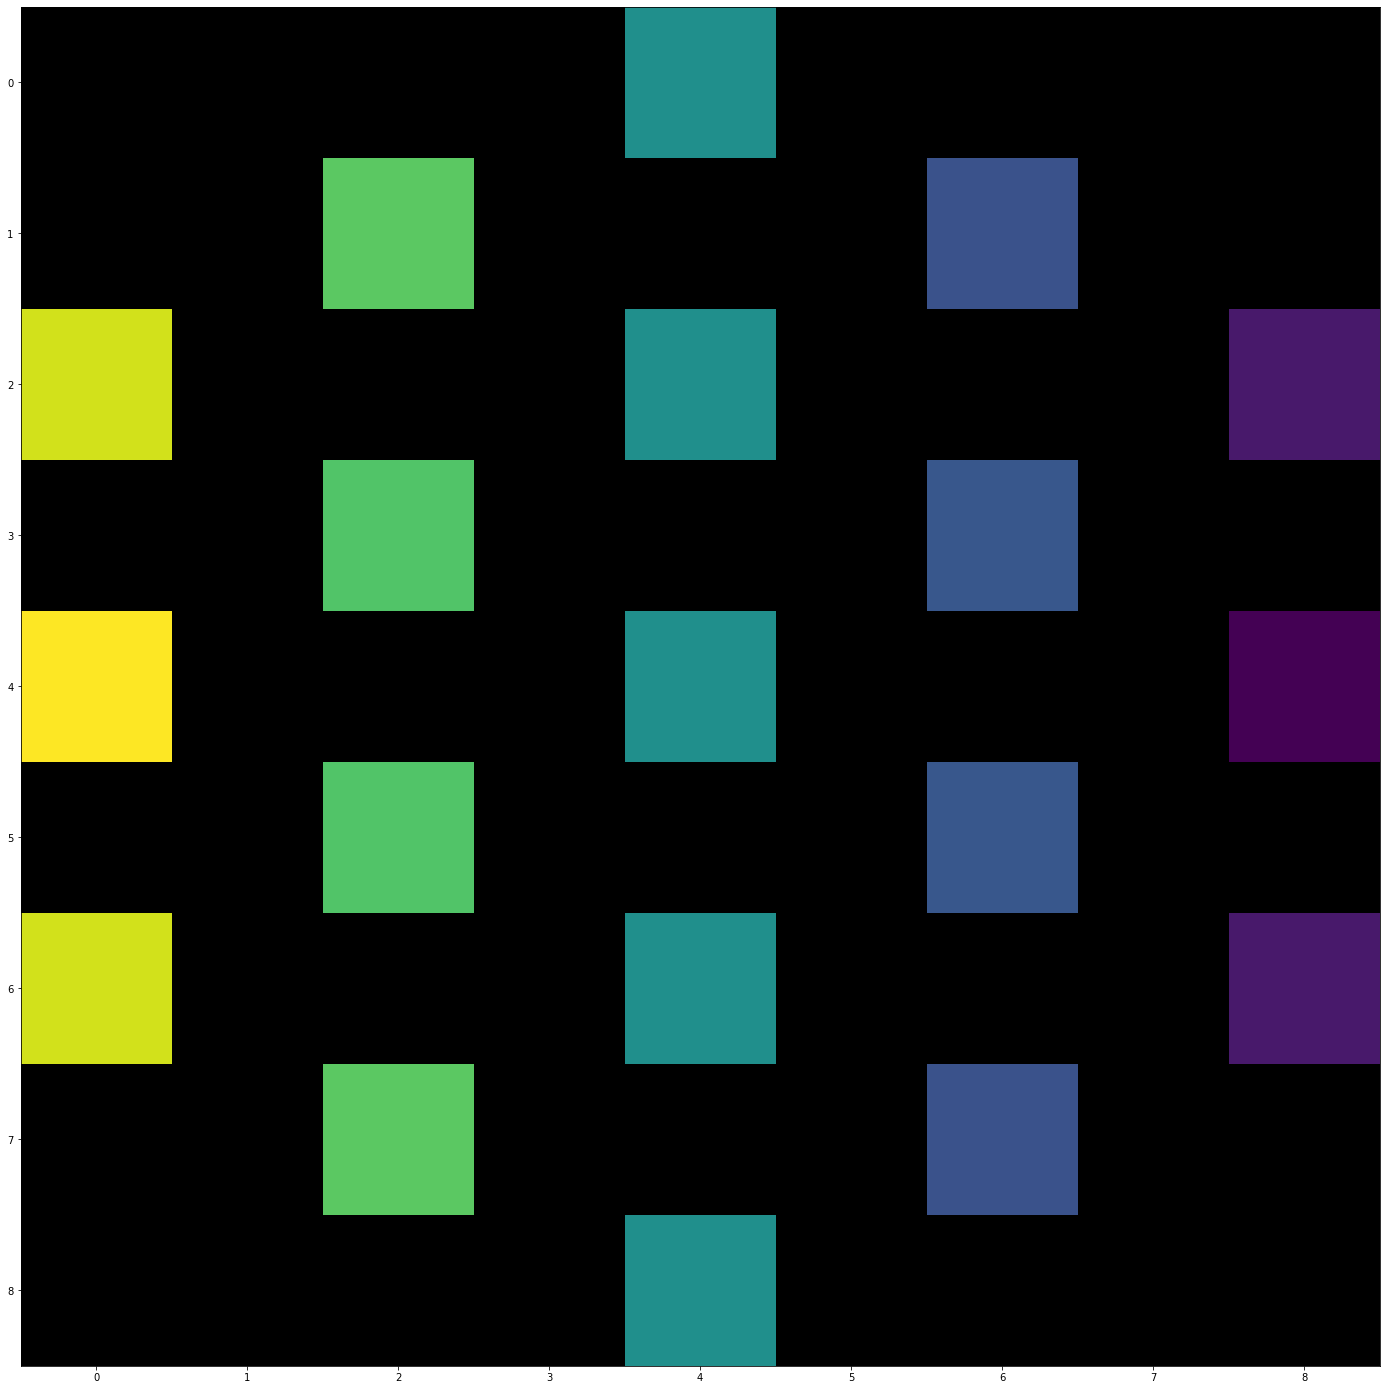

In [11]:
fig, ax = plt.subplots(1,1,figsize=(25,25),facecolor='w')
cmap = plt.cm.viridis
cmap.set_bad(color='black')
a=get_plot_array(np.moveaxis(image_pmt_coordinates[:,:,:,2],0,2))
# a = image_pmt_coordinates[1,:,:,2]
ax.imshow(a[55:64, 209:218],
           origin="upper",
           cmap=cmap,
         )
plt.show()

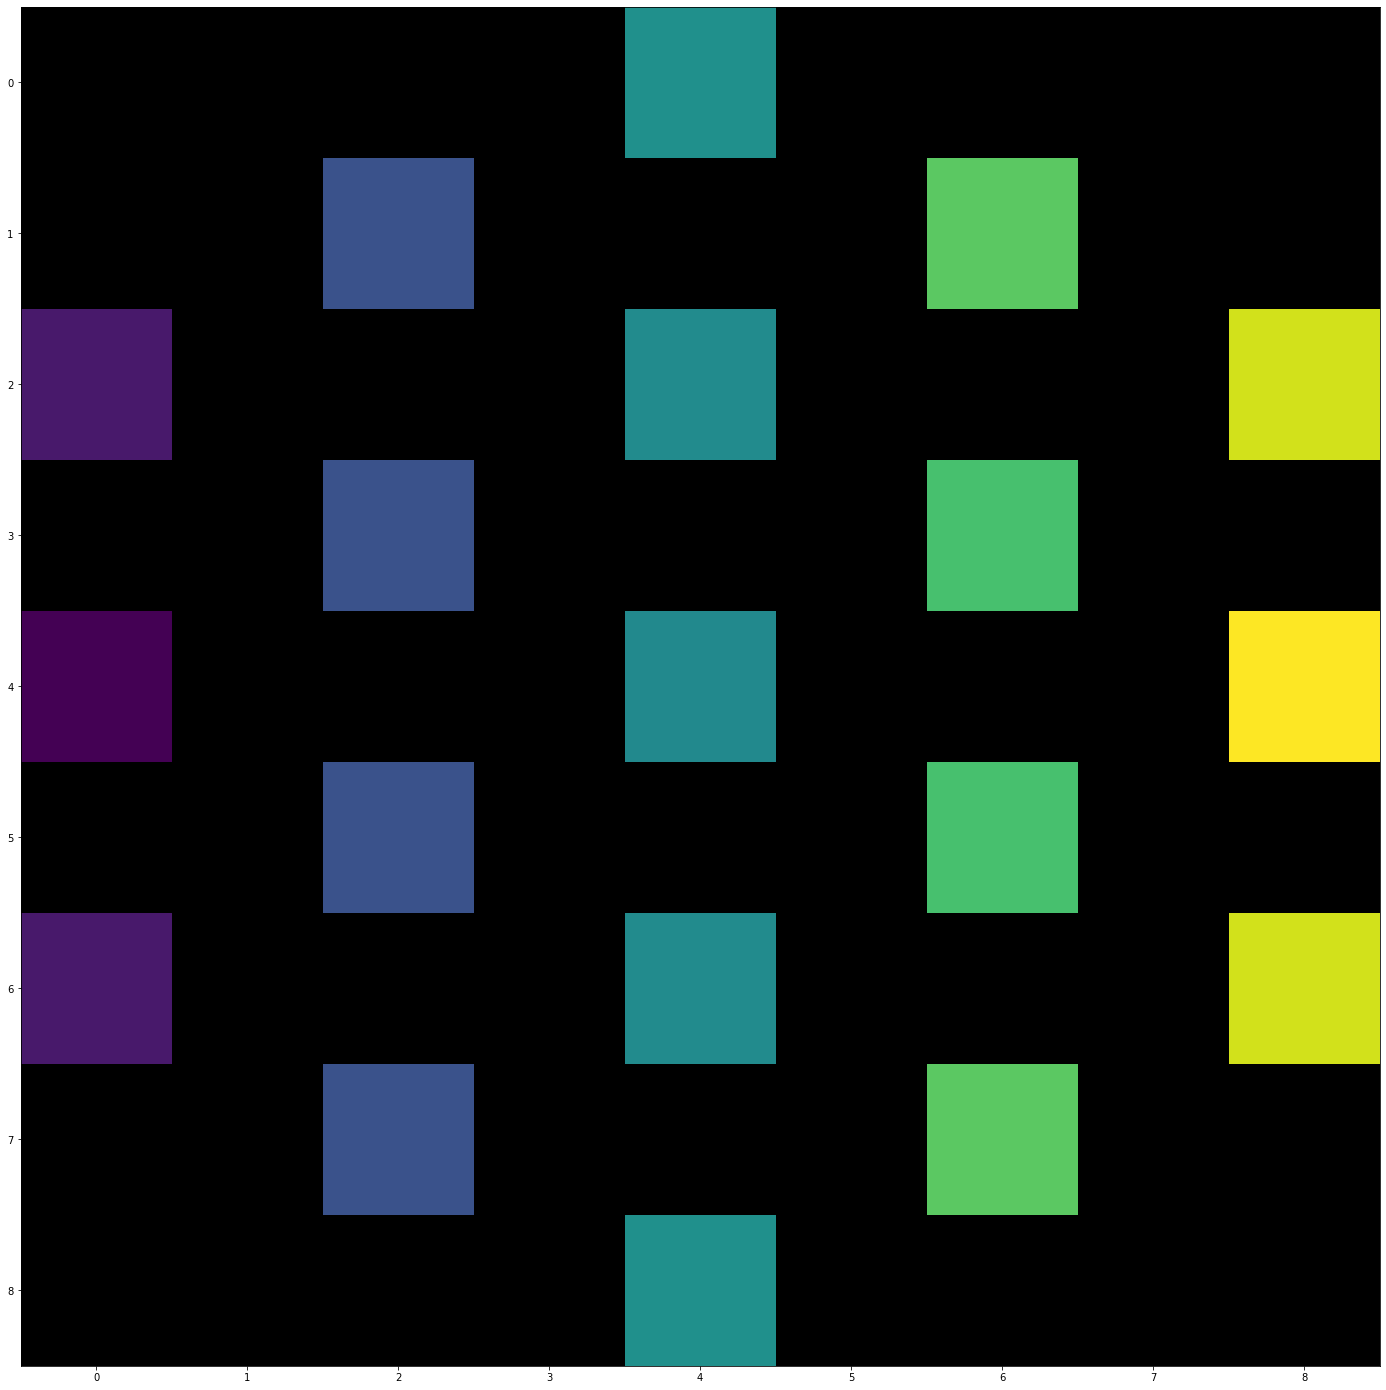

In [12]:
fig, ax = plt.subplots(1,1,figsize=(25,25),facecolor='w')
cmap = plt.cm.viridis
cmap.set_bad(color='black')
a=get_plot_array(np.moveaxis(image_pmt_coordinates[:,:,:,2],0,2))
# a = image_pmt_coordinates[1,:,:,2]
ax.imshow(a[143:152,209:218],
           origin="upper",
           cmap=cmap,
         )
plt.show()

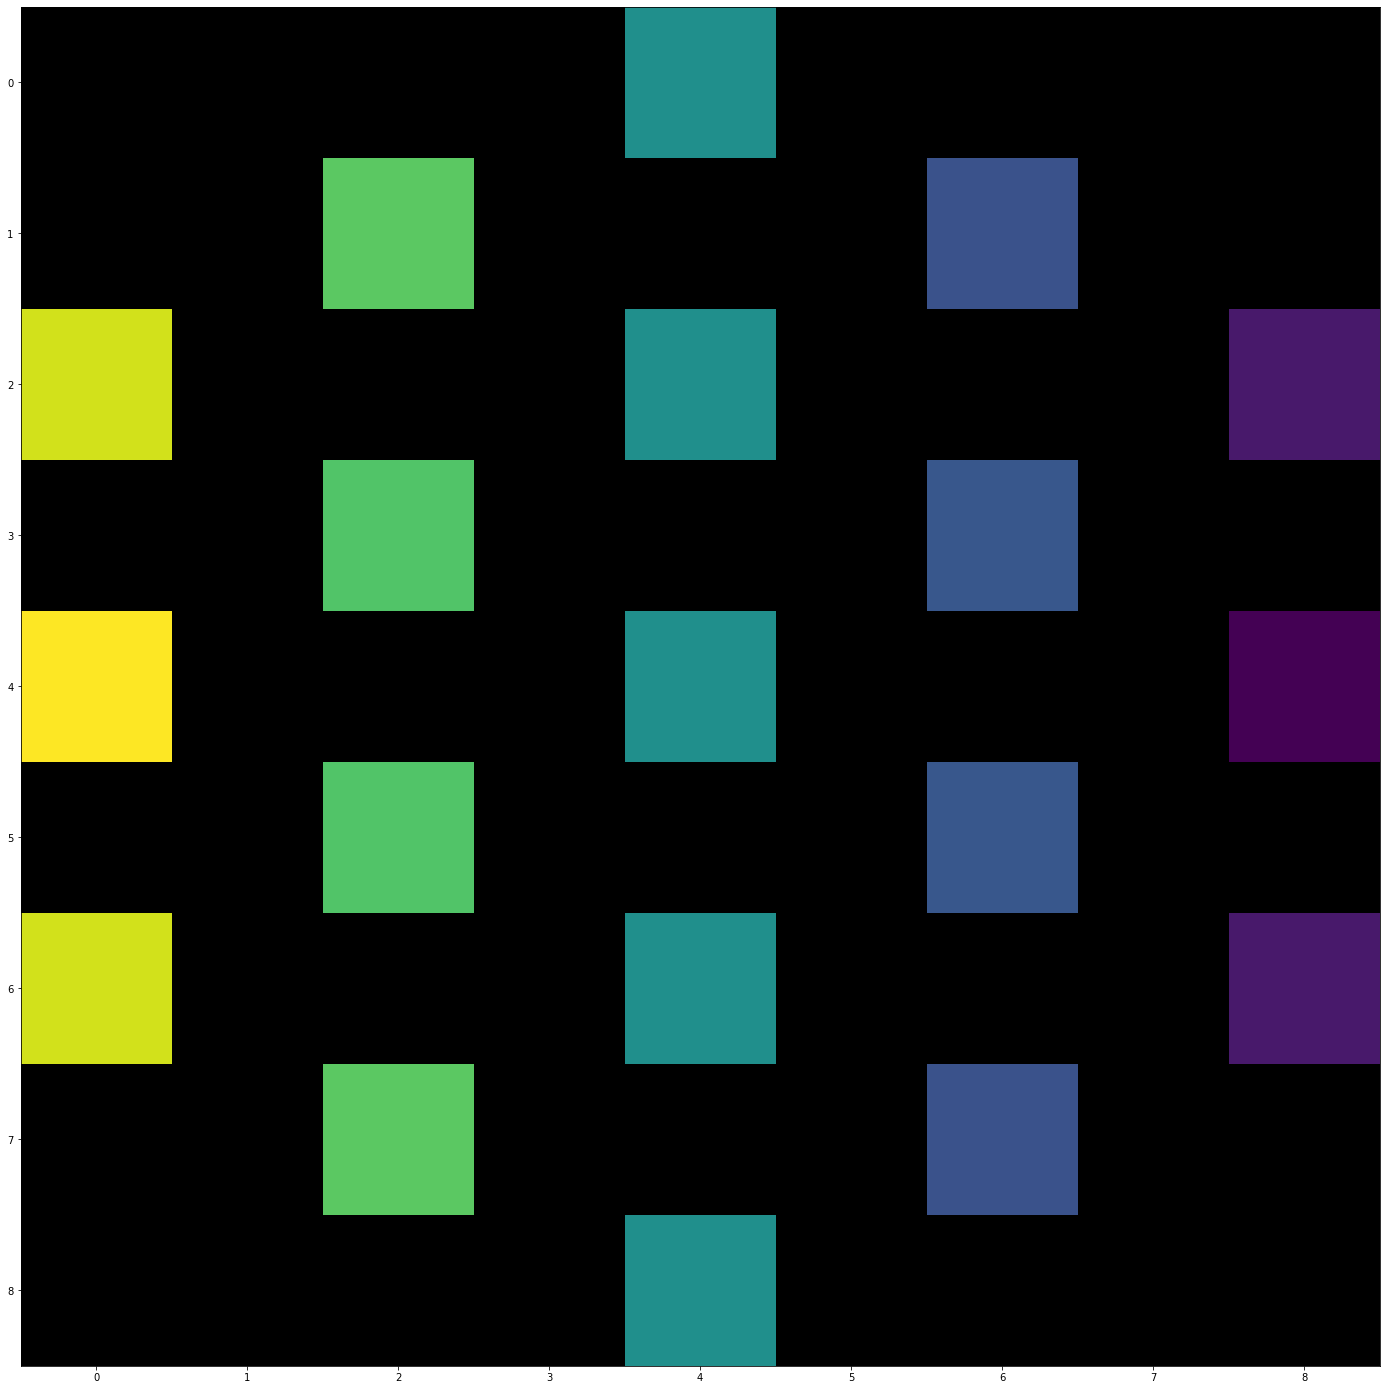

In [13]:
fig, ax = plt.subplots(1,1,figsize=(25,25),facecolor='w')
cmap = plt.cm.viridis
cmap.set_bad(color='black')
a=get_plot_array(np.moveaxis(image_pmt_coordinates[:,:,:,2],0,2))
# a = image_pmt_coordinates[1,:,:,2]
ax.imshow(a[374:383,209:218],
           origin="upper",
           cmap=cmap,
         )
plt.show()